
COLOR PALETTE IMDB:
Arancione = #deb522
Nero = 	#0c0b00
Azzurro = #128bb5
Arancione chiaro = #f2db83

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Understanding & Preparation

## Data Semantics
 • Introduce the variables with their meaning and characteristics;

In [2]:
df = pd.read_csv('test.csv')

In [3]:
df.head()

originalTitle   rating  startYear  \
0  Geologist of Animal Collective Performs Live a...  (9, 10]       2015   
1                                      Shan gou 1999   (4, 5]       1999   
2    The Craftsman: Preserving the Last Higgins Boat   (8, 9]       2023   
3                                    Week 3: Tuesday   (6, 7]       2020   
4                                          Traumhaus   (5, 6]       1999   

  endYear runtimeMinutes  awardWins  numVotes  worstRating  bestRating  \
0      \N             21        0.0        15            1          10   
1      \N             \N        0.0       304            1          10   
2      \N             \N        0.0        10            1          10   
3      \N             \N        0.0        11            1          10   
4      \N             90        NaN       145            1          10   

   totalImages  ...  titleType  awardNominationsExcludeWins  canHaveEpisodes  \
0            7  ...      video                            0            False   
1           10  ...      movie                            0            False   
2            2  ...  tvSpecial                            0            False   
3            0  ...  tvEpisode                            0            False   
4            2  ...  tvEpisode                            0            False   

  isRatable  isAdult  numRegions  userReviewsTotal  ratingCount  \
0      True        0           1                 0           15   
1      True        0           4                 8          304   
2      True        0           1                 0           10   
3      True        0           1                 0           11   
4      True        0           1                 0          145   

   countryOfOrigin               genres  
0           ['US']          Music,Short  
1           ['HK']               Horror  
2           ['US']           Reality-TV  
3           ['GB']            Game-Show  
4           ['DE']  Crime,Drama,Mystery  

[5 rows x 23 columns]

It's analyzed a dataset about films and tv series. There are 23 variables:
- originalTitle: 		Original title, in the original language.
- runtimeMinutes: 		Primary runtime of the title, in minutes.
- isAdult: 			Whether or not the title is for adult. 0: non-adult title; 1: adult title.
- startYear: 			Represents the release year of a title. In the case of TV Series, it is the series start year.
- endYear: 			TV Series end year.
- numVotes: 			Number of votes the title has received.
- numRegions: 	 		The regions number for this version of the title.
- worstRating: 			Worst title rating.
- bestRating: 			Best title rating.
- canHaveEpisodes:		Whether or not the title can have episodes.
- isRatable: 			Whether or not the title can be rated by users.
- totalImages:			Total Number of Images for the title within the IMDb title page.
- totalVideos: 			Total Number of Videos for the title within the IMDb title page.
- totalCredits:			Total Number of Credits for the title.
- criticReviewsTotal:		Total Number of Critic Reviews.
- awardWins:			Number of awards the title won.
- awardNominationsExcludeWins: 	Number of award nominations excluding wins.
- titleType:			The type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc).
- rating:			IMDB title rating class.
- ratingCount: 			The total number of user ratings submitted for the title.
- countryOfOrigin: 		The country where the title was primarily produced.
- genres: 			The genre(s) associated with the title (e.g., drama, comedy, action).
- userReviewsTotal  		Total Number of Users Reviews.

We've chosen the following variables: (non le sceglierei da qua le variabili)


*   numVotes
*   awardWins
*   rating
*   numRegions


### Type delle variabili

In [4]:
df.dtypes

originalTitle                   object
rating                          object
startYear                        int64
endYear                         object
runtimeMinutes                  object
awardWins                      float64
numVotes                         int64
worstRating                      int64
bestRating                       int64
totalImages                      int64
totalVideos                      int64
totalCredits                     int64
criticReviewsTotal               int64
titleType                       object
awardNominationsExcludeWins      int64
canHaveEpisodes                   bool
isRatable                         bool
isAdult                          int64
numRegions                       int64
userReviewsTotal                 int64
ratingCount                      int64
countryOfOrigin                 object
genres                          object
dtype: object

Analyzing the variables it can be seen that there are 4 types of variables:
- object
- integers(int64)
- floats (float64)
- booleans (bool)

It's noted that endYear is tipe object and it should be int64, award wins should be int

In [5]:
#le variabili sono state trasformate in float e non in int a causa dei valori mancanti del dataframe, che non possono essere convertiti in int
#i valori non convertibili vengono sostituiti con NaN, che è un valore di tipo float

df['endYear'] = pd.to_numeric(df['endYear'], errors='coerce')
df['awardWins'] = pd.to_numeric(df['awardWins'], errors='coerce')
df['runtimeMinutes'] = pd.to_numeric(df['runtimeMinutes'], errors='coerce')
df['isAdult'] = df['isAdult'].astype(bool)

df.dtypes

originalTitle                   object
rating                          object
startYear                        int64
endYear                        float64
runtimeMinutes                 float64
awardWins                      float64
numVotes                         int64
worstRating                      int64
bestRating                       int64
totalImages                      int64
totalVideos                      int64
totalCredits                     int64
criticReviewsTotal               int64
titleType                       object
awardNominationsExcludeWins      int64
canHaveEpisodes                   bool
isRatable                         bool
isAdult                           bool
numRegions                       int64
userReviewsTotal                 int64
ratingCount                      int64
countryOfOrigin                 object
genres                          object
dtype: object

In [6]:
df_copy = df.copy()
df_copy.rename(columns={'awardNominationsExcludeWins':'AwNmExWins'},inplace=True)

In [7]:
'''
#4min e 46sec di elaborazione, runnare la cella con cautela
import seaborn as sns

sns.pairplot(df_copy)
plt.show()
'''

'\n#4min e 46sec di elaborazione, runnare la cella con cautela\nimport seaborn as sns\n\nsns.pairplot(df_copy)\nplt.show()\n'

## Distribution of the variables and statistics
• Explore (single, pairs of…) variables quantitatively (e.g., statistics, distributions);

In [8]:
numeric_df = df_copy.select_dtypes(include=[np.number])

# Calcolare le statistiche descrittive
desc = numeric_df.describe().round(2)

desc

startYear  endYear  runtimeMinutes  awardWins    numVotes  worstRating  \
count    5478.00   273.00         3818.00    4591.00     5478.00       5478.0   
mean     1991.68  2001.24           62.82       0.50     1524.27          1.0   
std        26.02    17.78           46.90       4.46    22578.74          0.0   
min      1894.00  1953.00            1.00       0.00        5.00          1.0   
25%      1977.00  1988.00           26.00       0.00       14.00          1.0   
50%      1997.00  2006.00           60.00       0.00       37.00          1.0   
75%      2013.00  2017.00           90.00       0.00      145.00          1.0   
max      2024.00  2024.00         1050.00     254.00  1071372.00          1.0   

       bestRating  totalImages  totalVideos  totalCredits  criticReviewsTotal  \
count      5478.0      5478.00      5478.00       5478.00             5478.00   
mean         10.0        10.68         0.27         60.34                3.11   
std           0.0        57.35         2.39        109.97               18.47   
min          10.0         0.00         0.00          0.00                0.00   
25%          10.0         1.00         0.00         16.00                0.00   
50%          10.0         2.00         0.00         35.00                0.00   
75%          10.0         6.00         0.00         65.00                1.00   
max          10.0      2526.00        83.00       2482.00              567.00   

       AwNmExWins  numRegions  userReviewsTotal  ratingCount  
count     5478.00     5478.00           5478.00      5478.00  
mean         0.54        3.59              7.46      1525.02  
std          4.68        5.86             61.37     22585.58  
min          0.00        1.00              0.00         5.00  
25%          0.00        1.00              0.00        14.00  
50%          0.00        1.00              0.00        38.00  
75%          0.00        4.00              2.00       145.00  
max        256.00       63.00           2423.00   1071690.00

From the general statistics it's see that for awardWins the mean is 0.49 while the median is 0. It's highlighted that at least the 75% of units never won an award as it can be see from the value of the third quartile.  
This attribute has a low std, meaning that data are distributed near the mean.  
  
For the numVotes the average is far from the median and also from the third quartile, so there are many title with a low number of votes and some units with a lot of ratings.  
In this case, there is a very high variability, the data are distributed far from the mean.  
  
Instead, for totalCredits the mean is a bit far from the median and 75% of the title have at least 65 credits.  
The value of std is high, so the data points are widely spread out from the mean. 
  
For the total of critic and user reviews it can be see that as before the median is 0 while the mean have an higher value, so at least 50% of the films have 0 reviews. The user reviews have in mean an higher value than critic ones.  
For the first features the data are distributed near the mean more than the second features where std has a high value.  
  
The statistics of ratingCount have very similar values to numVotes. These two variables differ by a few data points.

In [9]:
primo_large = df_copy['originalTitle'].loc[df_copy['numVotes'] == 966565]
secondo_Nlarge = df_copy['numVotes'].nlargest(2).iloc[-1]
secondo_large = df_copy['originalTitle'].loc[df_copy['numVotes'] == secondo_Nlarge]
terzo_Nlarge = df_copy['numVotes'].nlargest(3).iloc[-1]
terzo_large = df_copy['originalTitle'].loc[df_copy['numVotes'] == terzo_Nlarge]
print(primo_large, 966565)
print(secondo_large, secondo_Nlarge)
print(terzo_large, terzo_Nlarge)

Series([], Name: originalTitle, dtype: object) 966565
55    Jaws
Name: originalTitle, dtype: object 675597
1689    Zombieland
Name: originalTitle, dtype: object 632383


From the output code it is noticed that the first 3 units for number of votes belong to the category 'movies' of the variable 'titleType'.
These are respectively:
1. Harry Potter and the Deathly Hallows - Part 2 with 966.565 votes.
2. Il buono, il brutto, il cattivo with 825.934 votes.
3. Full Metal Jacket with 803.146 votes.

In [10]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Definizione dei colori di IMDb
imdb_colors = ['#FFA500', '#0c0b00', '#128bb5', '#f2db83']

# Creazione dei sottoplot con meno distanza
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('awardWins', 'totalCredits', 'numVotes', 'criticReviewsTotal'),
    vertical_spacing=0.15,  # Riduce la distanza verticale
    horizontal_spacing=0.1  # Riduce la distanza orizzontale
)

# Grafico per awardWins
fig.add_trace(go.Histogram(x=df_copy['awardWins'], nbinsx=int(50/0.9), marker_color=imdb_colors[0]), row=1, col=1)

# Grafico per totalCredits
fig.add_trace(go.Histogram(x=df_copy['totalCredits'], nbinsx=int(400/2), marker_color=imdb_colors[1]), row=1, col=2)

# Grafico per numVotes
fig.add_trace(go.Histogram(x=df_copy['numVotes'], nbinsx=int(400/2), marker_color=imdb_colors[2]), row=2, col=1)

# Grafico per criticReviewsTotal con limite sull'asse y
fig.add_trace(go.Histogram(x=df_copy['criticReviewsTotal'], nbinsx=int(400/5), marker_color=imdb_colors[3]), row=2, col=2)

# Aggiungi etichette per ogni asse
fig.update_xaxes(title_text="Number of awards win", row=1, col=1)
fig.update_yaxes(title_text="Frequency", row=1, col=1)

fig.update_xaxes(title_text="Total of credits", row=1, col=2)
fig.update_yaxes(title_text="Frequency", row=1, col=2)

fig.update_xaxes(title_text="Number of votes", row=2, col=1)
fig.update_yaxes(title_text="Frequency", row=2, col=1)

fig.update_xaxes(title_text="Critic reviews", row=2, col=2)
fig.update_yaxes(title_text="Frequency", row=2, col=2)


# Aggiornamento del layout
fig.update_layout(showlegend=False, width= 1200 ,height=800)

# Mostra il grafico
fig.show()

In these graphs it is analyzed the frequences of awardWins, totalCredits, numVotes and criticReviewsTotal. Due to the high frequences of the data and the range, in some cases, the distribution of the data is not clear enough.  
There is a need to trasform the data for a better analysis.

In [11]:
import plotly.express as px

# Raggruppa per titleType e calcola la media dei premi vinti
df_grouped = df_copy.groupby(['titleType'])['awardWins'].mean().reset_index()

# Ordina il DataFrame per awardWins in ordine decrescente
df_grouped = df_grouped.sort_values(by='awardWins', ascending=False)

# Definizione dei colori di IMDb con un giallo più tendente all'arancione
imdb_colors = ['#FFA500', '#0c0b00', '#128bb5', '#f2db83']

# Crea un bar plot usando Plotly con i colori di IMDb e aumentando il font dei titoli, numeri e nomi
fig = px.bar(df_grouped, x='titleType', y='awardWins',
             color_discrete_sequence=imdb_colors)

# Aggiorna il layout per aumentare il font dei titoli, numeri e nomi
fig.update_layout(
    width=1200,
    height=600,
    xaxis_title_font=dict(size=38),
    yaxis_title_font=dict(size=38),
    xaxis_tickfont=dict(size=30),
    yaxis_tickfont=dict(size=30)

)

fig.show()

By this graph it can be seen the sum of award wins for each title type in the dataset. Furthermore it is highlighted how the totality of objects that have won an award are not an adult type content.

In [12]:
import plotly.express as px
import pandas as pd

# Raggruppa per rating e calcola la media dei premi vinti
df_grouped = df_copy.groupby(['rating'])['awardWins'].mean().reset_index()

# Definizione dei colori di IMDb con un giallo più tendente all'arancione
imdb_colors = ['#0c0b00']

# Crea un bar plot usando Plotly con i colori di IMDb
fig = px.bar(df_grouped, x='rating', y='awardWins',
             color_discrete_sequence=imdb_colors)

# Aggiorna il layout per aumentare il font dei titoli, numeri e nomi
fig.update_layout(
    width=1200,
    height=600,
    xaxis_title_font=dict(size=38),
    yaxis_title_font=dict(size=38),
    xaxis_tickfont=dict(size=30),
    yaxis_tickfont=dict(size=30)
)

# Mostra il grafico
fig.show()

## Assessing data quality
• Are present errors, outliers, missing values, semantic inconsistencies, etc?

### Missing Value

In [13]:
df_copy.isna().sum()

originalTitle            0
rating                   0
startYear                0
endYear               5205
runtimeMinutes        1660
awardWins              887
numVotes                 0
worstRating              0
bestRating               0
totalImages              0
totalVideos              0
totalCredits             0
criticReviewsTotal       0
titleType                0
AwNmExWins               0
canHaveEpisodes          0
isRatable                0
isAdult                  0
numRegions               0
userReviewsTotal         0
ratingCount              0
countryOfOrigin          0
genres                   0
dtype: int64

In [14]:
def variable_cleaner (variable_chosen):
    df_copy[variable_chosen] = df_copy[variable_chosen].replace('\\N', np.nan)

# Filtra i titoli con runtimeMinutes uguale a NaN
    prova = df_copy.loc[df_copy[variable_chosen].isna()]

for c in df_copy.columns:
    variable_cleaner(c)

    
df_copy.isna().sum()


originalTitle            0
rating                   0
startYear                0
endYear               5205
runtimeMinutes        1660
awardWins              887
numVotes                 0
worstRating              0
bestRating               0
totalImages              0
totalVideos              0
totalCredits             0
criticReviewsTotal       0
titleType                0
AwNmExWins               0
canHaveEpisodes          0
isRatable                0
isAdult                  0
numRegions               0
userReviewsTotal         0
ratingCount              0
countryOfOrigin          0
genres                 121
dtype: int64

In [15]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



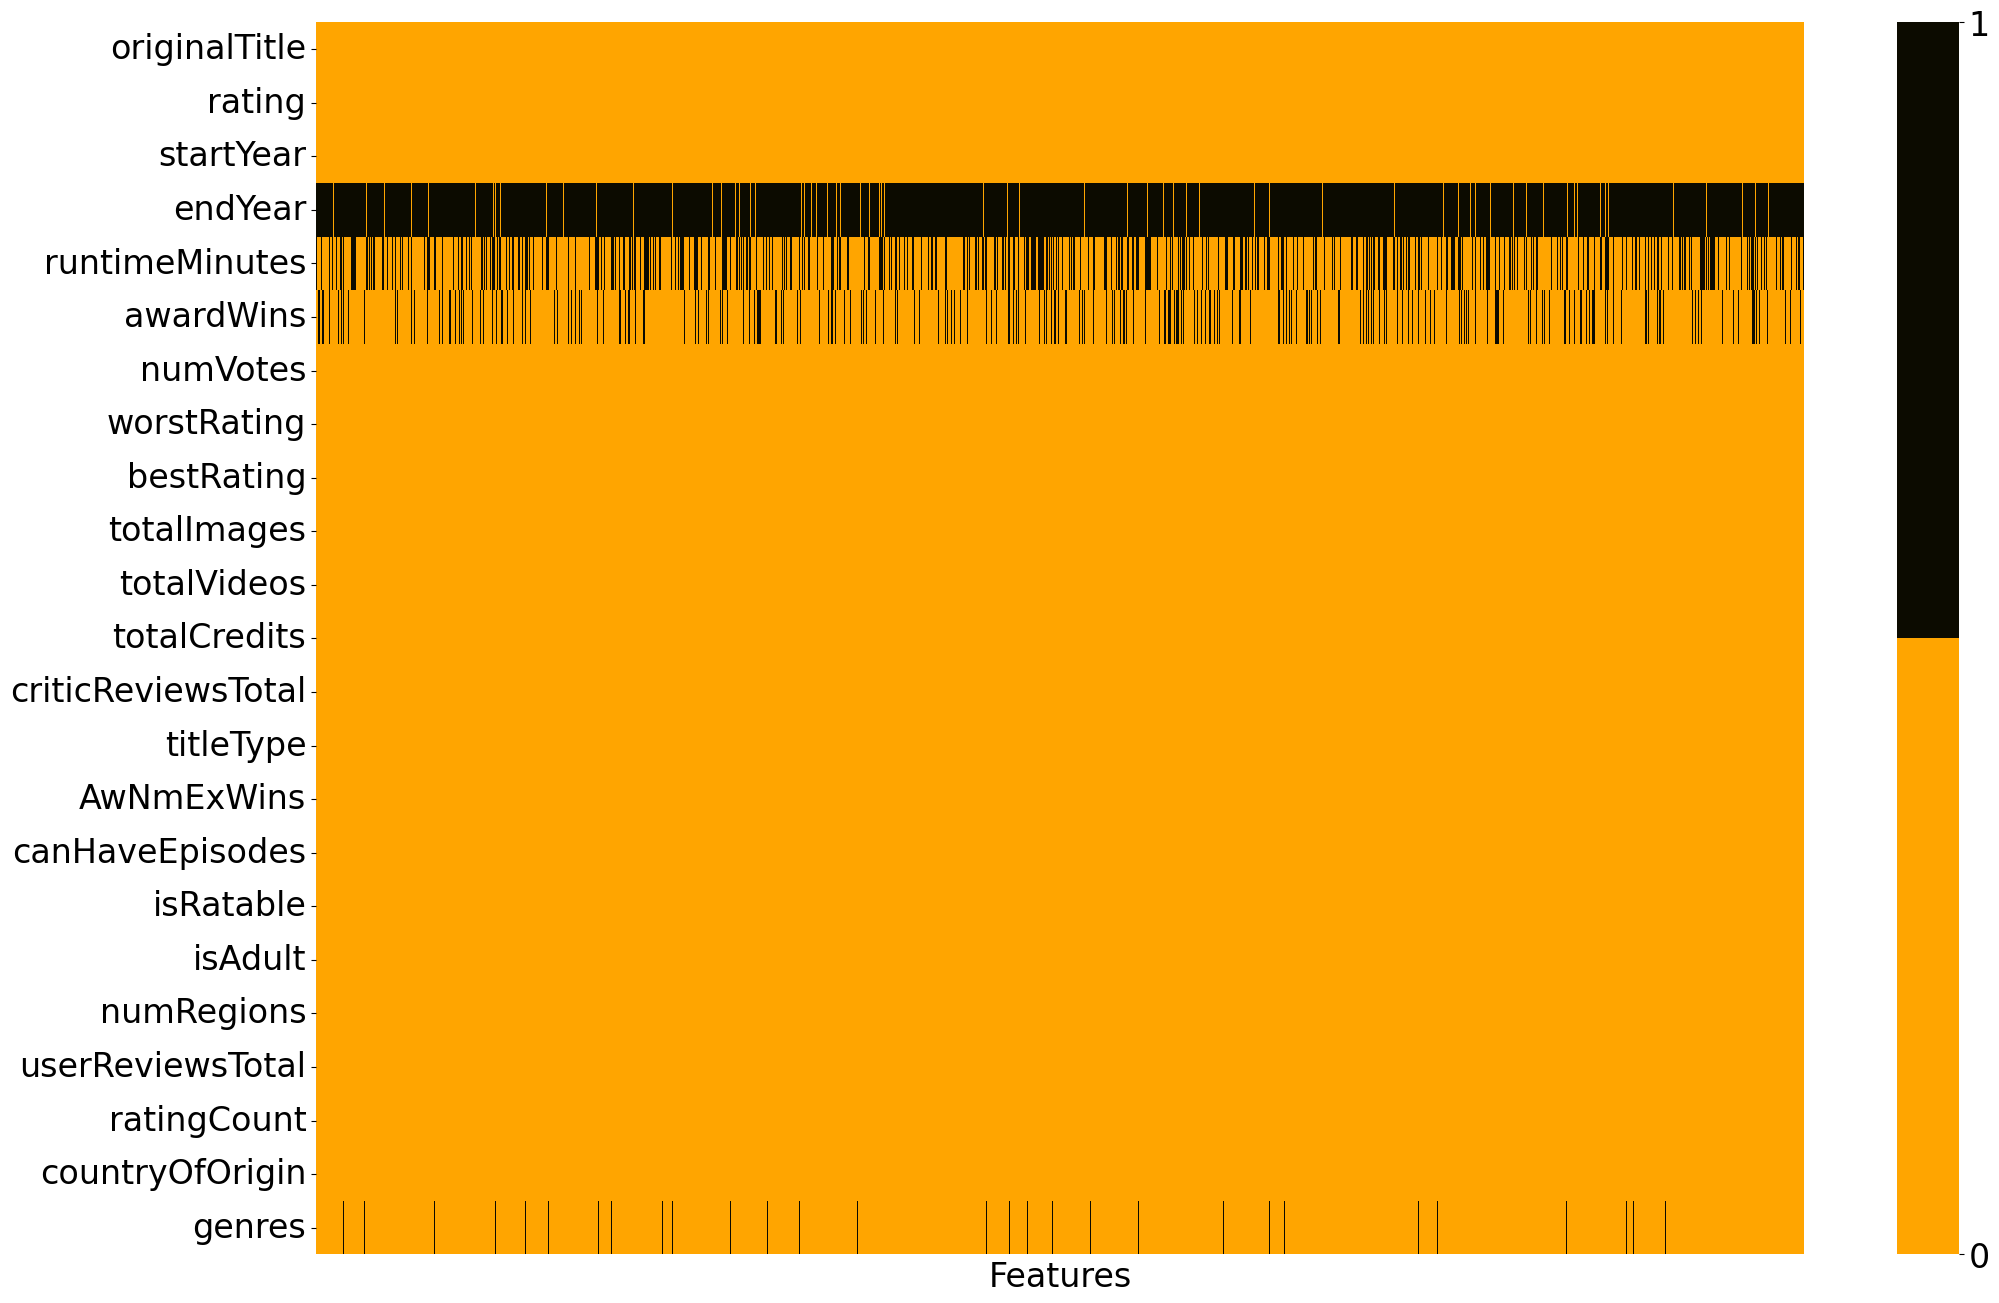

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Crea una mappa dei colori personalizzata con un colore più arancione e nero
from matplotlib.colors import LinearSegmentedColormap

# Definisci i colori
colors = ["#FFA500", "#0c0b00"]  # Nero e un arancione più arancione

# Crea la mappa dei colori
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=2)

# Personalizza la dimensione della figura per la leggibilità
plt.figure(figsize=(24, 16))

# Trasponi il DataFrame per invertire gli assi
sns.heatmap(df_copy.isnull().T, cbar=True, cmap=cmap, cbar_kws={'ticks': [0, 1]})

plt.gca().collections[0].colorbar.ax.tick_params(labelsize=24)  # Regola il font delle etichette dei tick

# Aggiungi titolo e etichette per chiarezza
plt.xlabel("Features", fontsize=24)  # Features sull'asse x ora
# Rimuovi i numeri sull'asse delle x
plt.xticks([])
plt.yticks(fontsize=24)

plt.show()

The '\N' values in the variables are replaced with NaN values, so that they can be counted as missing values.

There are:
- 2.618 missing values in the variable 'awardWins'
- 4.852 missing values in the variable 'runtimeMinutes'
- 15.617 missing values in the variable 'endYear'
- 382 missing values in the variable 'genres'

For the missing value from runtimeMinutes substitude them with the average runtime minutes grouped by titleType

In [17]:
def fill_na_with_mean(df_copy, column, group_by):
    df_copy[column] = pd.to_numeric(df_copy[column], errors='coerce')  # Assicura che la colonna sia numerica
    df_copy[column] = df_copy[column].fillna(df_copy.groupby(group_by)[column].transform('mean'))
    return df_copy

# Riempie i valori NaN in 'runtimeMinutes' con la media dei runtime minutes divisi per 'titleType'
df_copy = fill_na_with_mean(df_copy, 'runtimeMinutes', 'titleType')

df_copy['runtimeMinutes']

0        21.000000
1        93.315825
2       113.500000
3        40.960073
4        90.000000
           ...    
5473    141.000000
5474     22.000000
5475     85.000000
5476     50.616071
5477     30.000000
Name: runtimeMinutes, Length: 5478, dtype: float64

In [18]:
# Supponiamo che il DataFrame sia già stato creato e che la colonna runtimeMinutes sia stata convertita in numerico
df_copy['runtimeMinutes'] = pd.to_numeric(df_copy['runtimeMinutes'], errors='coerce')

# Riempire i valori NaN con 0
# df_copy['runtimeMinutes'] = df_copy['runtimeMinutes'].fillna(0)

# Ora convertiamo la colonna in interi
df_copy['runtimeMinutes'] = df_copy['runtimeMinutes'].astype(int)
df_copy['runtimeMinutes']

0        21
1        93
2       113
3        40
4        90
       ... 
5473    141
5474     22
5475     85
5476     50
5477     30
Name: runtimeMinutes, Length: 5478, dtype: int64

Rimosso endYear

In [19]:
# Rimuovere la colonna
df_copy = df_copy.drop('endYear', axis=1)

print(df_copy)

                                          originalTitle   rating  startYear  \
0     Geologist of Animal Collective Performs Live a...  (9, 10]       2015   
1                                         Shan gou 1999   (4, 5]       1999   
2       The Craftsman: Preserving the Last Higgins Boat   (8, 9]       2023   
3                                       Week 3: Tuesday   (6, 7]       2020   
4                                             Traumhaus   (5, 6]       1999   
...                                                 ...      ...        ...   
5473                             Parasiz yasamak pahali   (7, 8]       1994   
5474                                 Wedding Bell Blues   (6, 7]       1994   
5475                    O anthropos pou to 'paize poly!   (3, 4]       1983   
5476                             Above Average Presents   (6, 7]       2012   
5477                     Omae wa mada Gunma wo shiranai   (4, 5]       2017   

      runtimeMinutes  awardWins  numVotes  worstRat

Per awardWins mettiamo 0 poiche almeno il 75% delle osservazione ha vinto 0 premi

In [20]:
# Riempire i valori NaN con 0
df_copy['awardWins'] = df_copy['awardWins'].fillna(0)

# Ora convertiamo la colonna in interi
df_copy['awardWins'] = df_copy['awardWins'].astype(int)
df_copy['awardWins']


0       0
1       0
2       0
3       0
4       0
       ..
5473    0
5474    0
5475    0
5476    0
5477    0
Name: awardWins, Length: 5478, dtype: int64

Per genre rimuoviamo le colonne che hanno i valore null in genre

In [21]:
df_copy = df_copy.dropna(subset=['genres'])

### OUTLIERS  
 IQR METHOD 

In questo caso, a causa delle distribuzioni (dire qualcosa sulle distribuzioni) gli outlier non vengono calcolati con IQR ma visivamente con gli scatterplot

C:\Users\alban\AppData\Local\Temp\ipykernel_4568\4209834072.py:14: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



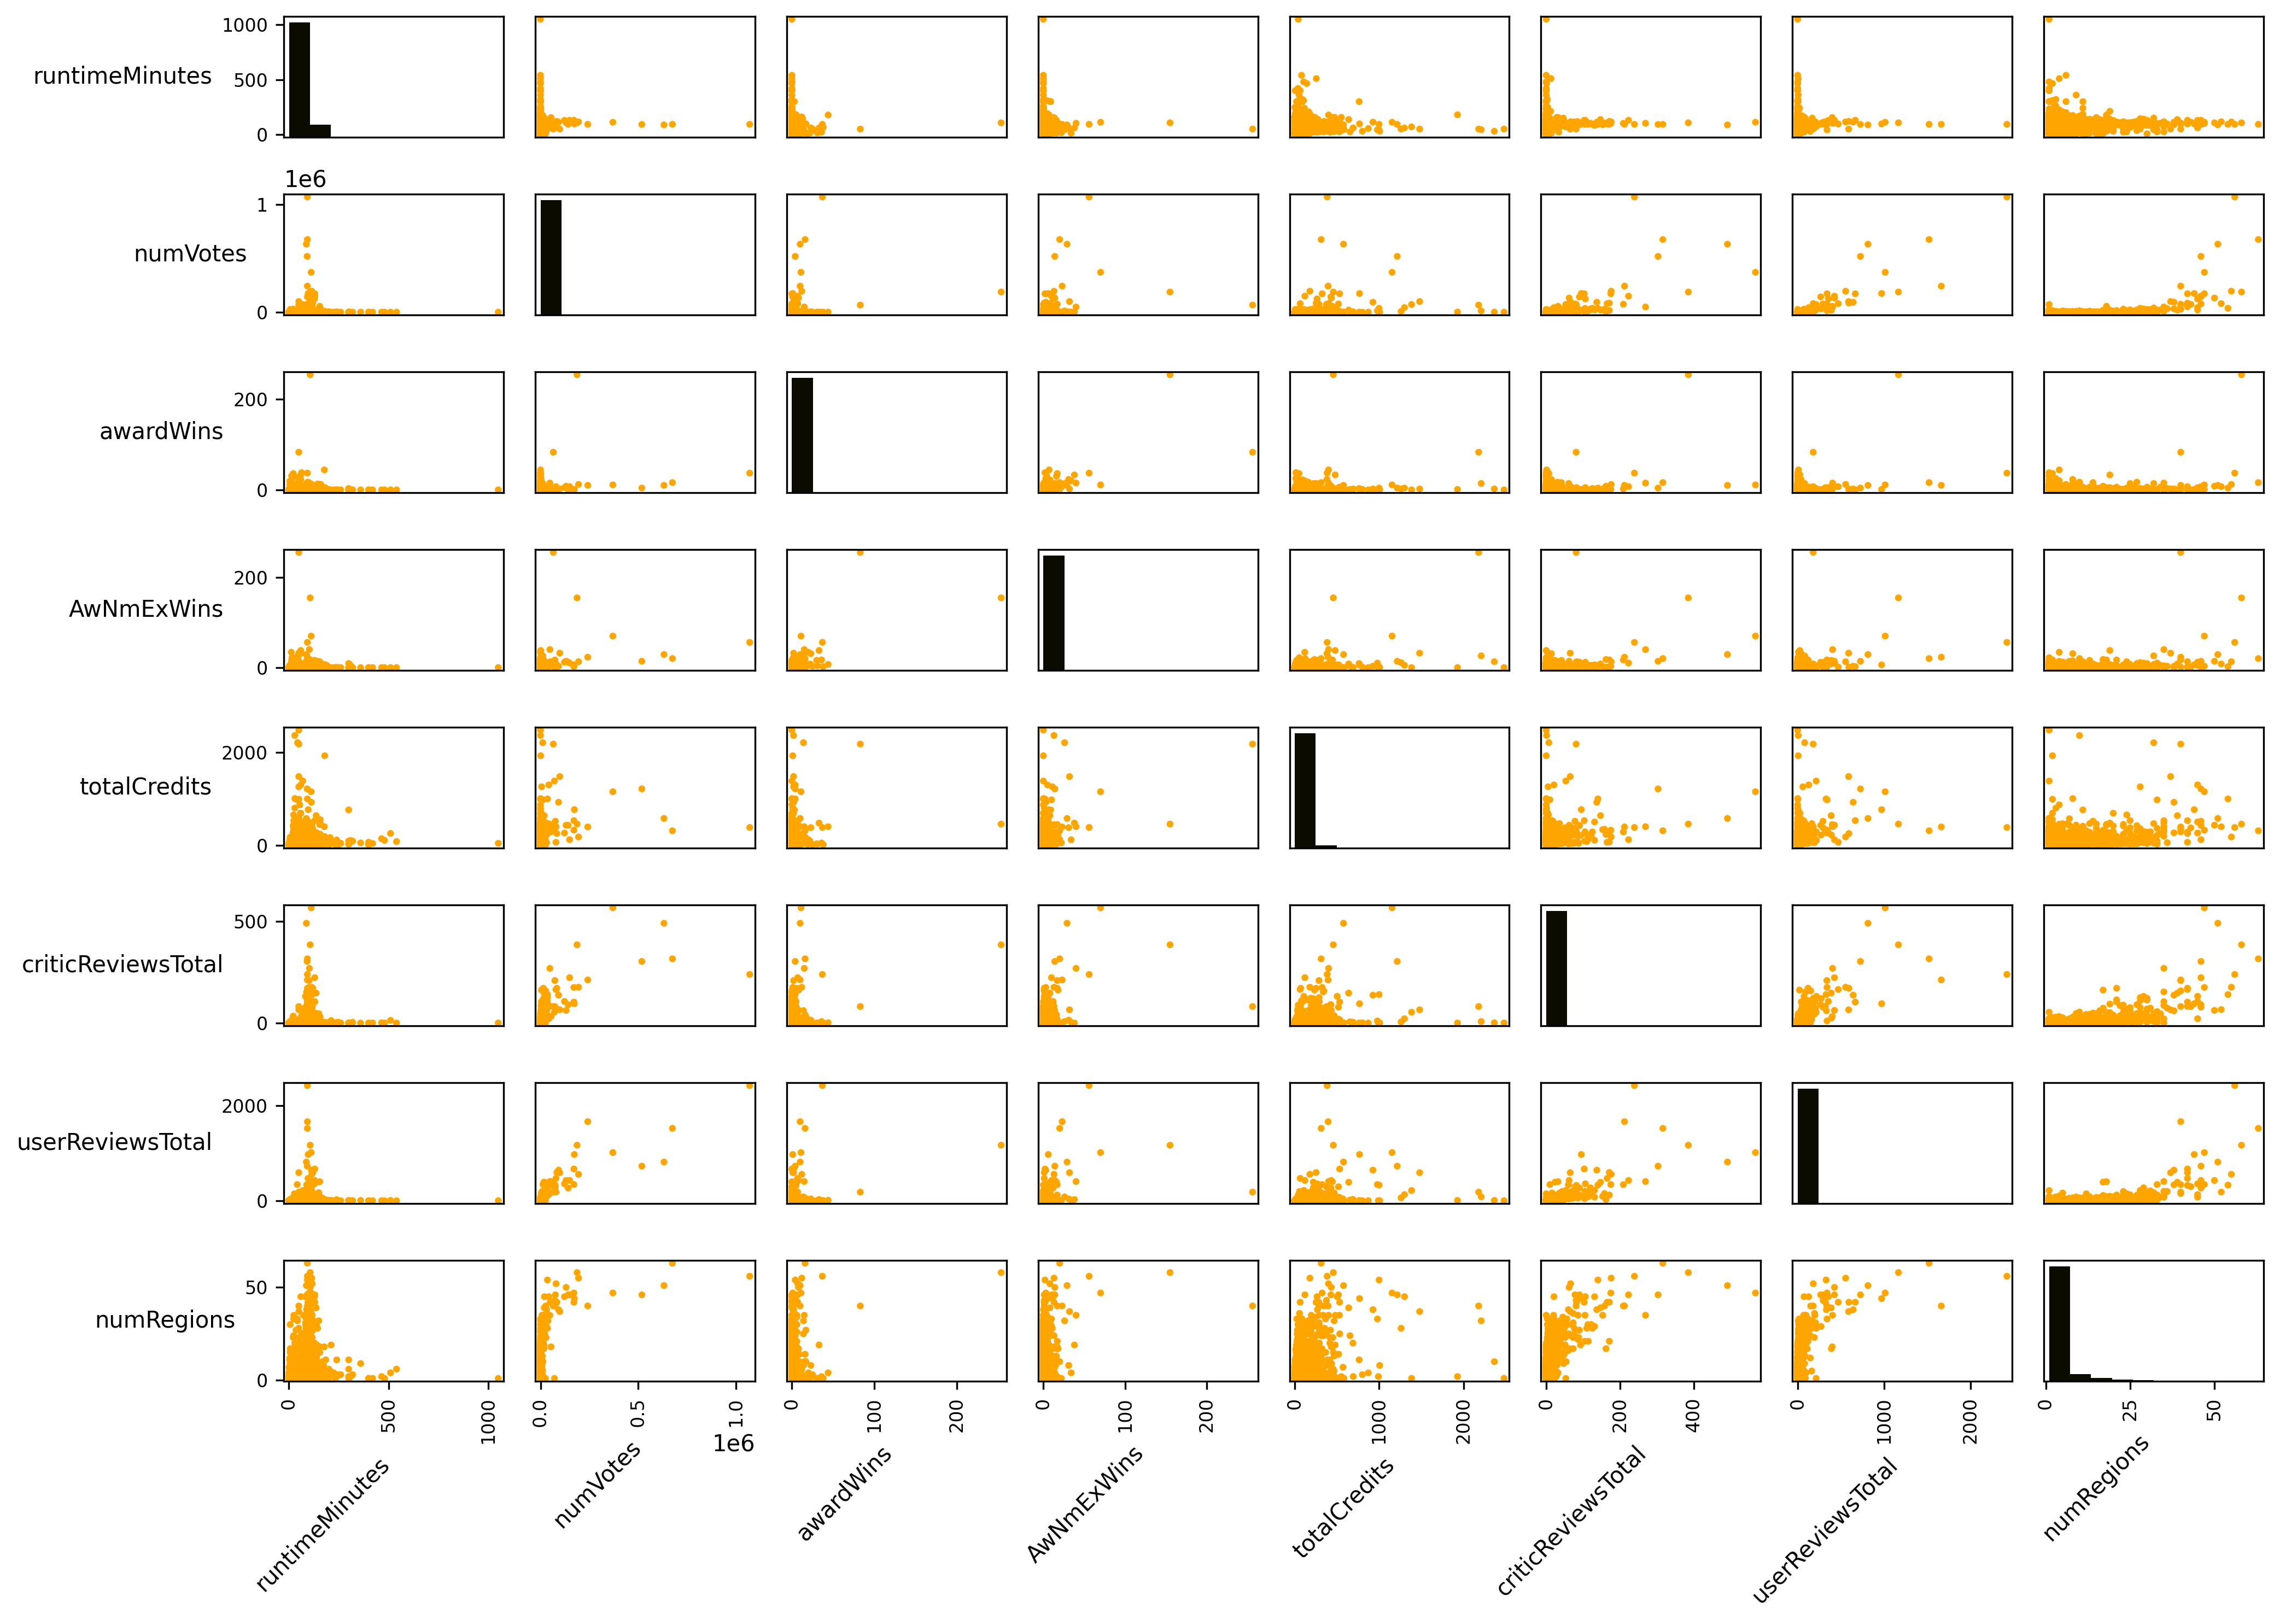

In [22]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Seleziona le colonne rilevanti per la scatter matrix
columns = ['runtimeMinutes', 'numVotes', 'awardWins', 'AwNmExWins', 
           'totalCredits', 'criticReviewsTotal', 'userReviewsTotal', 'numRegions']

# Crea la scatter matrix
fig, ax = plt.subplots(figsize=(14, 10), dpi=300)

# Genera la scatter matrix e salva i subplots negli assi
scatter = scatter_matrix(df_copy[columns], alpha=1, figsize=(14, 10), diagonal='hist', color='#FFA500', ax=ax)

# Imposta il colore per i grafici diagonali
for i in range(len(columns)):
    scatter[i, i].hist(df_copy[columns[i]], color='#0c0b00')  # Colore desiderato

# Allinea le etichette delle variabili sugli assi
for i, ax in enumerate(scatter[:, 0]):  # Etichette sull'asse y
    ax.set_ylabel(columns[i], rotation=0, ha='right', va='center', fontsize=10)

for j, ax in enumerate(scatter[-1, :]):  # Etichette sull'asse x
    ax.set_xlabel(columns[j], rotation=45, ha='right', fontsize=10)

# Aggiorna il layout per evitare sovrapposizioni
plt.tight_layout()
plt.show()


Vengono fatti gli scatter delle seguenti variabili che mostrano totalCredits, userReviewsTotal, AwNmExWins, runtimeMinutes

In [23]:
# Creiamo lo scatter plot
fig = px.scatter(df_copy, x='totalCredits', y='userReviewsTotal', title='Scatterplot di totalCredits vs userReviewsTotal', color_discrete_sequence=['#FFA500'])

# Aggiorniamo le etichette degli assi
fig.update_layout(
    xaxis_title='totalCredits',
    yaxis_title='userReviewsTotal'
)

# Mostriamo il grafico
fig.show()

In [24]:
# Creiamo lo scatter plot
fig = px.scatter(df_copy, x='runtimeMinutes', y='AwNmExWins', title='Scatterplot di runtimeMinutes vs AwNmExWins', color_discrete_sequence=['#FFA500'])

# Aggiorniamo le etichette degli assi
fig.update_layout(
    xaxis_title='runtimeMinutes',
    yaxis_title='AwNmExWins'
)

# Mostriamo il grafico
fig.show()

In [25]:
for c in df_copy[['totalCredits', 'userReviewsTotal', 'runtimeMinutes', 'numVotes', 'numRegions', 'criticReviewsTotal', 'awardWins', 'AwNmExWins']].columns:
    # Ordina i dati della variabile 'totalCredits' in ordine decrescente
    df_sorted = df_copy.sort_values(by=c, ascending=False)
    
    # Mostra i dati ordinatiù
    print(df_sorted[c])

45      2482
1859    2367
4333    2211
5119    2181
541     1930
        ... 
593        0
1902       0
4679       0
558        0
9          0
Name: totalCredits, Length: 5357, dtype: int64
4257    2423
1753    1663
55      1522
2438    1167
602     1013
        ... 
5473       0
5474       0
5475       0
2194       0
4796       0
Name: userReviewsTotal, Length: 5357, dtype: int64
4472    1050
549      540
5444     510
4427     480
3216     465
        ... 
5044       1
156        1
4015       1
4293       1
9          1
Name: runtimeMinutes, Length: 5357, dtype: int64
4257    1071372
55       675597
1689     632383
3119     518915
602      370604
         ...   
4693          5
56            5
2483          5
2469          5
5450          5
Name: numVotes, Length: 5357, dtype: int64
55      63
2438    58
4257    56
5234    55
4927    54
        ..
58       1
5395     1
5396     1
5382     1
5383     1
Name: numRegions, Length: 5357, dtype: int64
602     567
1689    491
2438    385
55 

Vengono rimossi gli outliers

In [26]:
# FARE RUN QUESTA CELLA SOLO UNA VOLTA, SENNO FARE RUN ALL

# Troviamo i due valori più alti nella colonna specificata
outliers = df_copy['runtimeMinutes'].nlargest(2).values

# Rimuoviamo le righe che contengono i due valori più alti nella colonna specificata
df_copy = df_copy[~df_copy['runtimeMinutes'].isin(outliers)]

# Troviamo i due valori più alti nella colonna specificata
outliers = df_copy['AwNmExWins'].nlargest(1).values

# Rimuoviamo le righe che contengono i due valori più alti nella colonna specificata
df_copy = df_copy[~df_copy['AwNmExWins'].isin(outliers)]

# Troviamo i due valori più alti nella colonna specificata
outliers = df_copy['userReviewsTotal'].nlargest(2).values

# Rimuoviamo le righe che contengono i due valori più alti nella colonna specificata
df_copy = df_copy[~df_copy['userReviewsTotal'].isin(outliers)]

# Troviamo i due valori più alti nella colonna specificata
outliers = df_copy['totalCredits'].nlargest(7).values

# Rimuoviamo le righe che contengono i due valori più alti nella colonna specificata
df_copy = df_copy[~df_copy['totalCredits'].isin(outliers)]

In [27]:
# Creiamo lo scatter plot
fig = px.scatter(df_copy, x='totalCredits', y='userReviewsTotal', title='Scatterplot di totalCredits vs userReviewsTotal', color_discrete_sequence=['#FFA500'])

# Aggiorniamo le etichette degli assi
fig.update_layout(
    xaxis_title='totalCredits',
    yaxis_title='userReviewsTotal'
)

# Mostriamo il grafico
fig.show()

In [28]:
# Creiamo lo scatter plot
fig = px.scatter(df_copy, x='runtimeMinutes', y='AwNmExWins', title='Scatterplot di runtimeMinutes vs AwNmExWins', color_discrete_sequence=['#FFA500'])

# Aggiorniamo le etichette degli assi
fig.update_layout(
    xaxis_title='runtimeMinutes',
    yaxis_title='AwNmExWins'
)

# Mostriamo il grafico
fig.show()

### Wrong Data

Sono stati rimossi i titoli che hanno 0 totalCredits perche si ritiene che ogni title debba averne almeno 1

In [29]:
df_copy = df_copy[df_copy['totalCredits'] != 0]

## Variable transformations
 • Is it better to use for further modules transformed variables (e.g., log-transformated)?

The ratings are given as a range (ten equally spaced intervals from one to ten). They have therefore been replaced with the mean of the range.

In [30]:
#function to calculate the interval mean
def interval_mean(value):
# Rimuove i caratteri '[' e ')' e divide usando ','
    estremi = value.replace('(', '').replace(']', '').split(',')
    minimo = float(estremi[0])
    massimo = float(estremi[1])
    # Calcola e restituisce la media
    return (minimo + massimo) / 2

# Applica la funzione alla colonna 'Intervallo' per ottenere la media
df_copy['ratingMean'] = df_copy['rating'].apply(interval_mean)

In [31]:
# Creare bin di larghezza bin_width
bin_width = 0.5
bins = np.arange(0.5, 10, bin_width)

# Creare l'istogramma con Plotly e impostare il colore
fig = px.histogram(df_copy, x='ratingMean', nbins=len(bins), title='Istogramma di ratingMean', color_discrete_sequence=['#FFA500'])

# Aggiornare le etichette degli assi e impostare i valori dell'asse x da 0.5 a 9.5
fig.update_layout(
    xaxis_title='Rating mean',
    yaxis_title='Frequency',
    xaxis=dict(tickmode='array', tickvals=np.arange(0.5, 10, bin_width))
)

# Mostrare il grafico
fig.show()

### Aggregation

Aggregate le reviews

In [32]:
df_copy['ReviewsTotal'] = df_copy['userReviewsTotal'] + df_copy['criticReviewsTotal']

# Eliminare le colonne 'A' e 'B'
df_copy = df_copy.drop(['userReviewsTotal', 'criticReviewsTotal'], axis=1)

Rimozione Variabili irrilevanti

In [33]:
df_copy['numVotes'].corr(df_copy['ratingCount'])
# The two variables 'numVotes' and 'ratingCount' represent the same attribute, so we can eliminate one of them.

np.float64(0.9999999301842074)

In [34]:
df_copy = df_copy.drop(['bestRating', 'worstRating','isRatable'], axis=1)

Aggregazione premi vinti con candidature senza vittorie, per sample and variable reduction

In [35]:
correlation = df_copy['awardWins'].corr(df_copy['AwNmExWins'])
correlation

np.float64(0.8015642831549727)

In [36]:
# df_copy['nominations'] = df_copy['awardWins'] + df_copy['AwNmExWins']

# # Eliminare le colonne 'A' e 'B'
# df_copy = df_copy.drop(['awardWins', 'AwNmExWins'], axis=1)

### Variable Transf

#### Log-trasform

Con il fine di rendere le distribuzioni piu omogeneee e ridurre l'impatto degli outlier senza perdere troppa info, viene effettuata una trasformazione logaritmica sommano tutti i valori per una costante molto piccolo in modo tale da trattare i valori 0

In [37]:
# import pandas as pd
# import numpy as np
# import plotly.express as px
# from sklearn.preprocessing import MinMaxScaler

# # Calcolare la frequenza di ciascun valore di nominations
# frequency = df_copy['nominations'].value_counts().sort_index()

# # Applicare la trasformazione logaritmica alla frequenza
# log_frequency = np.log1p(frequency.values)

# # Creare un DataFrame per la frequenza trasformata
# log_df = pd.DataFrame({
#     'nominations': frequency.index,
#     'log_frequency': log_frequency
# })

# # Creare il grafico con Plotly
# fig = px.bar(log_df, x='nominations', y='log_frequency', title='Log Transformed Frequency Distribution of Nominations', labels={'nominations': 'Nominations', 'log_frequency': 'Log Frequency'})

# # Mostrare il grafico
# fig.show()


FILE NOLOG

In [38]:
df_copy.to_csv('test_nolog.csv', index=False)

In [39]:
# Applicare la trasformazione logaritmica alle variabili specificate
log_transformed_df = df_copy.copy()
# log_transformed_df['runtimeMinutes'] = np.log1p(log_transformed_df['runtimeMinutes'])
log_transformed_df['numVotes'] = np.log1p(log_transformed_df['numVotes'])
log_transformed_df['awardWins'] = np.log1p(log_transformed_df['awardWins'])
log_transformed_df['AwNmExWins'] = np.log1p(log_transformed_df['AwNmExWins'])
# log_transformed_df['totalCredits'] = np.log1p(log_transformed_df['totalCredits'])
log_transformed_df['ReviewsTotal'] = np.log1p(log_transformed_df['ReviewsTotal'])
# log_transformed_df['numRegions'] = np.log1p(log_transformed_df['numRegions'])
log_transformed_df['totalImages'] = np.log1p(log_transformed_df['totalImages'])
log_transformed_df['totalVideos'] = np.log1p(log_transformed_df['totalVideos'])

# Mantenere la variabile 'ratingMean' senza trasformazioni
log_transformed_df['ratingMean'] = df_copy['ratingMean']

# Visualizzare il nuovo DataFrame
log_transformed_df

originalTitle   rating  startYear  \
0     Geologist of Animal Collective Performs Live a...  (9, 10]       2015   
1                                         Shan gou 1999   (4, 5]       1999   
2       The Craftsman: Preserving the Last Higgins Boat   (8, 9]       2023   
3                                       Week 3: Tuesday   (6, 7]       2020   
4                                             Traumhaus   (5, 6]       1999   
...                                                 ...      ...        ...   
5473                             Parasiz yasamak pahali   (7, 8]       1994   
5474                                 Wedding Bell Blues   (6, 7]       1994   
5475                    O anthropos pou to 'paize poly!   (3, 4]       1983   
5476                             Above Average Presents   (6, 7]       2012   
5477                     Omae wa mada Gunma wo shiranai   (4, 5]       2017   

      runtimeMinutes  awardWins  numVotes  totalImages  totalVideos  \
0                 21        0.0  2.772589     2.079442     1.098612   
1                 93        0.0  5.720312     2.397895     0.000000   
2                113        0.0  2.397895     1.098612     0.000000   
3                 40        0.0  2.484907     0.000000     0.000000   
4                 90        0.0  4.983607     1.098612     0.000000   
...              ...        ...       ...          ...          ...   
5473             141        0.0  3.828641     0.693147     0.000000   
5474              22        0.0  2.995732     2.890372     0.000000   
5475              85        0.0  2.708050     0.693147     0.000000   
5476              50        0.0  4.718499     4.043051     0.000000   
5477              30        0.0  2.484907     0.693147     0.000000   

      totalCredits     titleType  AwNmExWins  canHaveEpisodes  isAdult  \
0               11         video         0.0            False    False   
1               40         movie         0.0            False    False   
2                6     tvSpecial         0.0            False    False   
3               52     tvEpisode         0.0            False    False   
4               44     tvEpisode         0.0            False    False   
...            ...           ...         ...              ...      ...   
5473            12         video         0.0            False    False   
5474            35     tvEpisode         0.0            False    False   
5475            30         movie         0.0            False    False   
5476           992      tvSeries         0.0             True    False   
5477            17  tvMiniSeries         0.0             True    False   

      numRegions  ratingCount countryOfOrigin               genres  \
0              1           15          ['US']          Music,Short   
1              4          304          ['HK']               Horror   
2              1           10          ['US']           Reality-TV   
3              1           11          ['GB']            Game-Show   
4              1          145          ['DE']  Crime,Drama,Mystery   
...          ...          ...             ...                  ...   
5473           1           45          ['TR']               Comedy   
5474           1           19          ['US']  Comedy,Family,Sport   
5475           1           14          ['GR']               Comedy   
5476           2          111          ['US']               Comedy   
5477           1           12          ['JP']               Comedy   

      ratingMean  ReviewsTotal  
0            9.5      0.000000  
1            4.5      2.890372  
2            8.5      0.000000  
3            6.5      0.000000  
4            5.5      0.693147  
...          ...           ...  
5473         7.5      0.000000  
5474         6.5      0.000000  
5475         3.5      0.000000  
5476         6.5      1.386294  
5477         4.5      0.000000  

[5317 rows x 19 columns]

Per una migliore interpretabiità dei dati nei passi successivi come la correlazione, L'ACP e il Clustering, datosi che le variabili si trovano su scale diverse viene effettuata la min max normalization. Questa è utile anche per il calcolo di nuovi indicatori. (DA CORREGGERE)

In [40]:
# export data

log_transformed_df.to_csv('train_log.csv', index=False)

In [41]:
# Selezionare solo le variabili numeriche
numeric_df = log_transformed_df.select_dtypes(include=[np.number])

# Calcolare la matrice di correlazione
correlation_matrix = numeric_df.corr().round(2)

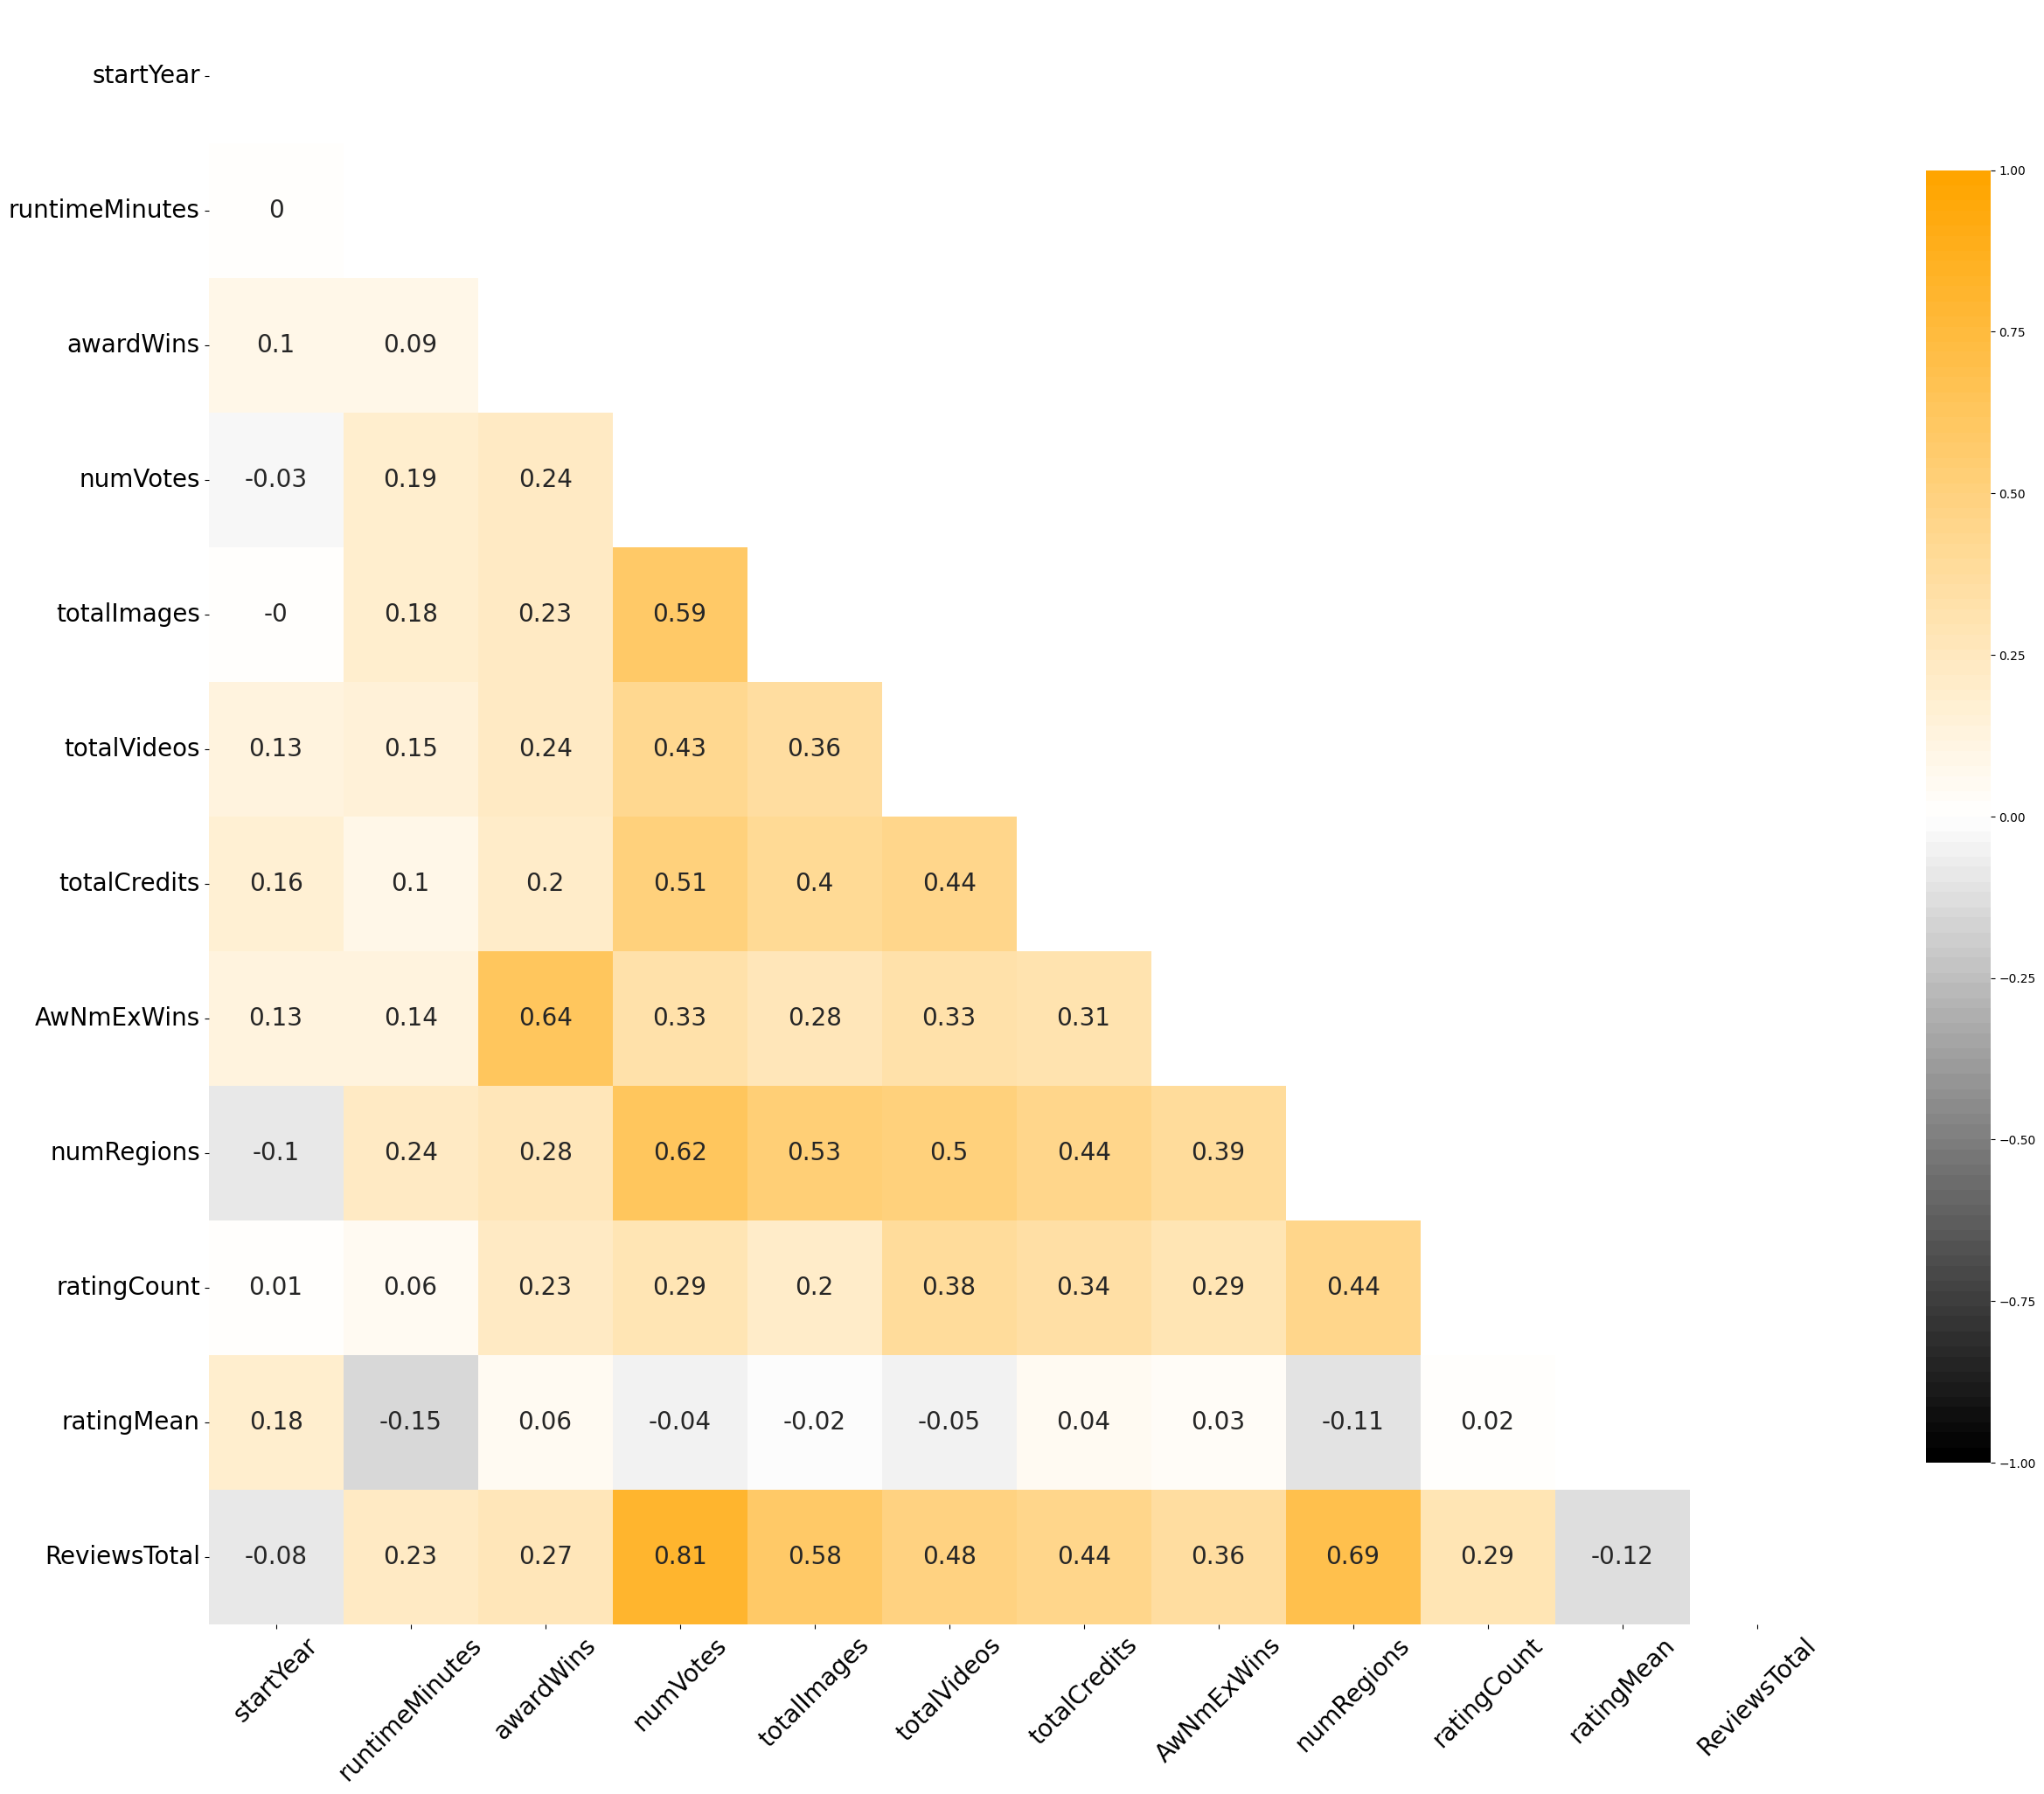

In [42]:
# Maschera per il triangolo superiore
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Impostare la figura di matplotlib
plt.figure(figsize=(30, 24))

# Creare una colormap personalizzata
colors = ["black", "white", "#FFA500"]
n_bins = 100  # Discretizzare la colormap
cmap_name = "custom_cmap"
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Disegnare la heatmap con una barra dei colori e aggiungere i numeri nei quadratini
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 20}, cmap=cm, square=True,
            cbar_kws={"shrink": 0.8}, vmin=-1, vmax=1, center=0, mask=mask)

# Aggiungere un titolo
# plt.title('Pearson correlation matrix', fontsize=50)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20, rotation=0)

# Mostrare il grafico
plt.show()

From the correlation matrix it can be seen a high positive connection between ReviewsTotal and numVotes, as expected. So if the first variable increases the other one increases in average. PopularityIndex is high positively correlated with totalVideos. It has a slight connection with numRegions, so if the popularity of a title increases the other variables increases in average. Other relevant positive correlation are between awardWins and AwNmExWins, between numRegion and ReviewsTotal and between totalImages and numVotes.  
There's not an almost perfect correlation so it's choosen to not eliminate some variables to not lose too much informations  
(Da riscrivere meglio con la tabella aggiornata)

### PCA

In [43]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df_log = pd.read_csv('train_log.csv')

In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import plotly.graph_objects as go

# Supponiamo che 'df_log' sia il DataFrame contenente le variabili log trasformate
# Selezionare solo le variabili numeriche
df_numeric = df_log.select_dtypes(include=[float, int])

# Standardizzare i dati prima di applicare la PCA
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_numeric)

# Applicare la PCA con 5 componenti principali
num_components = 5
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(df_standardized)

# Creare un DataFrame con le componenti principali
df_pca = pd.DataFrame(data=principal_components, columns=[f'PC {i+1}' for i in range(num_components)])

# Aggiungere i nomi delle variabili originali come indice del DataFrame
df_pca.index = df_numeric.index

# Visualizzare la variabilità spiegata delle variabili
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_df = pd.DataFrame({
    'Principal Component': [f'PC {i+1}' for i in range(num_components)],
    'Explained Variance Ratio': explained_variance_ratio[:num_components]
})

# Calcolare la somma totale della variabilità spiegata
total_explained_variance = explained_variance_ratio.sum()
print(f"Total Explained Variance: {total_explained_variance}")

# Loadings (senza rotazione)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Creare un DataFrame per i loadings con i nomi delle variabili
loadings_df = pd.DataFrame(loadings, index=df_numeric.columns, columns=[f'PC {i+1}' for i in range(num_components)])

# Calcolare la stima delle comunanze finali
communalities = np.sum(loadings_df**2, axis=1)
communalities_df = pd.DataFrame(communalities, columns=['Communalities'])

# Visualizzare le comunanze finali
print(communalities_df)

# Visualizzare i loadings
print(loadings_df)

# Creare lo scree plot con linee e punti utilizzando Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=explained_variance_df['Principal Component'],
    y=explained_variance_df['Explained Variance Ratio'],
    mode='lines+markers',
    name='Explained Variance Ratio',
    line=dict(color='#0c0b00', width=2, dash='dot'),  # Linea arancione tratteggiata
    marker=dict(size=10, color='#deb522', symbol='circle')  # Marker arancioni
))

fig.update_layout(
    title='Scree Plot',
    xaxis_title='Principal Component',
    yaxis_title='Explained Variance Ratio',
    font=dict(size=18, color='black'),  # Sfondo bianco
    paper_bgcolor='white'  # Sfondo dell'area di carta
)


fig.show()

Total Explained Variance: 0.7360219708125791
                Communalities
startYear            0.836065
runtimeMinutes       0.708854
awardWins            0.841280
numVotes             0.797523
totalImages          0.659822
totalVideos          0.614550
totalCredits         0.590327
AwNmExWins           0.797782
numRegions           0.724664
ratingCount          0.756894
ratingMean           0.695470
ReviewsTotal         0.810694
                    PC 1      PC 2      PC 3      PC 4      PC 5
startYear       0.040254  0.621218 -0.247663  0.614104  0.100368
runtimeMinutes  0.296369 -0.246961  0.394857  0.635679 -0.005491
awardWins       0.482840  0.515228  0.534618 -0.171817 -0.165371
numVotes        0.816434 -0.202415 -0.186195 -0.006630 -0.235105
totalImages     0.699645 -0.162659 -0.151657  0.062459 -0.341994
totalVideos     0.672323  0.086824 -0.143080  0.106714  0.350904
totalCredits    0.656739  0.127513 -0.343652  0.105701  0.116155
AwNmExWins      0.598803  0.467578  0.455597 

The number of components have been choosen based on the explained variability. Based on screeplot the component were 2 or 3, but 5 component represent the 76% of the informations.  
  
From the estimate of the final communalities all variable are well explained. Only totalCredits have a lower value.  
From the PCA it can be seen that the first component is representative of many instances: numVotes, totalImages, totalVideos, totalCredits, AwNmExWins, numRegions, ReviewsTotal, popularityIndex. So it's a general misure of popularity.  
The second component is representative of startYear and ratingMean so it's a misure of how recently and the rating of a film.
The PC3 have a high value in awardWins and AwNmExWins so it's a dimension of the success of the title.
The PC4 make the Distinzione tra film più vecchi e lunghi con meno video e rating medi più alti
The fifth component is a measure of modernity and duration.

In [45]:
# Rinominare le componenti principali nel DataFrame df_pca con nomi in inglese basati sugli indicatori
df_pca.columns = [
    'Popularity and Visibility', 
    'Quality and Production Year', 
    'Awards and Duration', 
    'Year and Duration', 
    'Duration and Rating'
]

# Visualizzare il DataFrame df_pca con i nuovi nomi delle componenti principali
df_pca.head()

Popularity and Visibility  Quality and Production Year  \
0                  -0.158378                     1.789349   
1                   1.168493                    -1.685462   
2                  -1.238130                     1.069106   
3                  -1.556184                     0.867614   
4                  -0.310338                    -0.630206   

   Awards and Duration  Year and Duration  Duration and Rating  
0            -1.867464           0.049975             0.385161  
1             0.297991           0.941377            -0.261552  
2            -0.191403           1.376032            -0.151325  
3            -0.268726           0.409713             0.835527  
4             0.288997           0.815634             0.244163

In [46]:
df_pca.to_csv('train_pca.csv', index=True)

### FINE -----------------------------------------------------------------------------

In [47]:
differenze = df[df['numVotes'] != df['ratingCount']]

# Calcola la differenza tra le colonne per ogni riga e mostralo
for idx, row in differenze.iterrows():
    print(f"Riga {idx}: numVotes = {row['numVotes']}, ratingCount = {row['ratingCount']}, differenza = {row['ratingCount'] - row['numVotes']}")

# Calcola la media delle differenze
differenze = df['ratingCount'] - df['numVotes']
media_differenze = differenze.mean()

# Mostra il risultato
print(f"\n La media delle differenze è: {media_differenze}")

# Conta il numero di righe in cui le differenze sono diverse da 0
differenze_diverse = (differenze != 0).sum()

print(f"\n Numero di righe con valori diversi: {differenze_diverse}")

# Calcola la differenza percentuale tra le due colonne (rispetto a colonna1)
percentuali_differenza = ((df['ratingCount'] - df['numVotes']) / df['ratingCount']) * 100

# Calcola la media della differenza percentuale
media_percentuale_differenza = percentuali_differenza.mean()

# Mostra il risultato
print(f"La media della differenza percentuale è: {media_percentuale_differenza}%")


# Calcolare la correlazione tra colonna1 e colonna2
correlazione_rc_nv = df['ratingCount'].corr(df['numVotes'])

# Stampare il risultato
print(f"Correlazione tra ratingCount e numVotes: {correlazione_rc_nv}")


Riga 6: numVotes = 521, ratingCount = 523, differenza = 2
Riga 8: numVotes = 769, ratingCount = 770, differenza = 1
Riga 33: numVotes = 815, ratingCount = 818, differenza = 3
Riga 34: numVotes = 577, ratingCount = 578, differenza = 1
Riga 40: numVotes = 468, ratingCount = 470, differenza = 2
Riga 55: numVotes = 675597, ratingCount = 675774, differenza = 177
Riga 64: numVotes = 109, ratingCount = 110, differenza = 1
Riga 65: numVotes = 6482, ratingCount = 6487, differenza = 5
Riga 69: numVotes = 38, ratingCount = 39, differenza = 1
Riga 100: numVotes = 703, ratingCount = 704, differenza = 1
Riga 122: numVotes = 299, ratingCount = 300, differenza = 1
Riga 132: numVotes = 7132, ratingCount = 7134, differenza = 2
Riga 141: numVotes = 1142, ratingCount = 1143, differenza = 1
Riga 144: numVotes = 373, ratingCount = 374, differenza = 1
Riga 159: numVotes = 118, ratingCount = 119, differenza = 1
Riga 160: numVotes = 818, ratingCount = 819, differenza = 1
Riga 161: numVotes = 158, ratingCount =

From this matrix it can be seen the correlation between each numeric variable in the dataset using the Spearman correlation method.

In [48]:
import seaborn as sns
# Se il DataFrame è molto grande, campiona un sottoinsieme più gestibile
# Imposta la dimensione del campione a un valore che il tuo sistema possa gestire, ad esempio 5 righe
df_no_boolean = df_copy.loc[~(df_copy['isAdult'] | df_copy['canHaveEpisodes'])]

df_no_boolean = df_no_boolean.drop(['isAdult', 'canHaveEpisodes'], axis=1)

df_sampled = df_no_boolean.corr(numeric_only = True, method="spearman")

plt.figure(figsize=(50, 44), dpi= 300)
sns.heatmap(df_sampled, annot=True, cmap='Reds', cbar=True, annot_kws={"size": 40})

plt.title('Distance Matrix Heatmap', fontsize = 70)
plt.xticks(fontsize=30, rotation = 90)
plt.yticks(fontsize=30, rotation = 0)


# Show the plot
plt.show()

In [ ]:
del df_copy['ratingCount']

In [49]:
# Crea uno scatter plot usando Plotly
fig = px.scatter(df_copy, x='awardWins', y='userReviewsTotal', title='Scatter Plot of Award Wins vs User Reviews Total')

# Mostra il grafico
fig.show()

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['originalTitle', 'rating', 'startYear', 'runtimeMinutes', 'awardWins', 'numVotes', 'totalImages', 'totalVideos', 'totalCredits', 'titleType', 'AwNmExWins', 'canHaveEpisodes', 'isAdult', 'numRegions', 'ratingCount', 'countryOfOrigin', 'genres', 'ratingMean', 'ReviewsTotal'] but received: userReviewsTotal

In [ ]:
pr_urt_max = df_copy['originalTitle'].loc[df_copy['userReviewsTotal'] == 5727]
se_aw_max = df_copy['originalTitle'].loc[df_copy['awardWins'] == 145]
tr_aw_max = df_copy['originalTitle'].loc[df_copy['awardWins'] == 109]
qr_aw_max = df_copy['originalTitle'].loc[df_copy['awardWins'] == 83]
se_aw_max, pr_urt_max, tr_aw_max, qr_aw_max

(551    No War
 Name: originalTitle, dtype: object,
 7672    The Witcher
 Name: originalTitle, dtype: object,
 1668    If Beale Street Could Talk
 Name: originalTitle, dtype: object,
 15166    Fargo
 Name: originalTitle, dtype: object)

In [ ]:
# Crea uno scatter plot usando Plotly
fig = px.scatter(df_copy, x='startYear', y='awardWins', title='Scatter Plot of Award Wins vs Start Year')

# Mostra il grafico
fig.show()

In [ ]:
# Crea uno scatter plot usando Plotly
fig = px.scatter(df_copy, x='runtimeMinutes', y='awardWins', title='Scatter Plot of Award Wins vs runtimeMinutes', color = 'titleType')

# Mostra il grafico
fig.show()

In [ ]:
df_copy['reviewsTotal'] = df_copy['userReviewsTotal'] + df_copy['criticReviewsTotal']

In [ ]:
df_copy['awardNominations'] = df_copy['awardWins'] + df_copy['awardNominationsExcludeWins']

In [ ]:
#STURGE'S RULE

def sturges_rule(df_copy, column_name):
    n = df_copy[column_name].dropna().shape[0]  # Conta il numero di valori non NaN nella colonna
    k = 1 + np.log2(n)
    return int(np.ceil(k))

sturges = sturges_rule(df_copy, 'awardWins')

Idea

- Possiamo distinguere le /N in endYear dei film e le /N delle serie tv non concluse (o degli episodi tv).